# Minimisation du risque empirique régularisé

On s'intéresse aux algorithmes d'apprentissage basés sur la minimisation du
risque empirique régularisé

$$\min_f \sum_i \ell(y_i ,f(x_i)) + \alpha \Omega(f) $$

In [1]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from yellowbrick.features import FeatureImportances
from yellowbrick.regressor import AlphaSelection, PredictionError

from src.features.hyperparameter_selection import EstimatorSelectionHelper
from src.data.csv_to_numpy import DataHelper

### Amélioration des affichages

In [2]:
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Concrete dataset

In [3]:
concrete = DataHelper('concrete')
X_train, X_test, y_train, y_test = concrete.gimme(normalized=False,
                                                  split_ratio=0.2,
                                                  seed=42)

### Régression ridge

* $\ell(y_i,f(x_i)) = (y_i - \beta^T x_i)^2$
* $\Omega(f) = \|\beta\|_2^2$ (norme $L_2$)

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7efe579bcb00>,
                   colormap=None, colors=None, is_fitted='auto', labels=None,
                   model=None, relative=True, stack=False, xlabel=None)

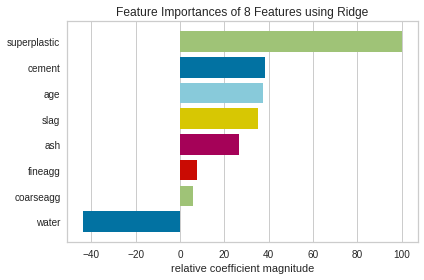

In [4]:
model = FeatureImportances(Ridge(alpha=5))
model.fit(X_train, y_train)
model.poof()

### Régression Lasso

* $\ell(y_i,f(x_i)) = (y_i - \beta^T x_i)^2$
* $\Omega(f) = \|\beta\|_1$ (norme $L_1$)

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7efe5561a828>,
                   colormap=None, colors=None, is_fitted='auto', labels=None,
                   model=None, relative=True, stack=False, xlabel=None)

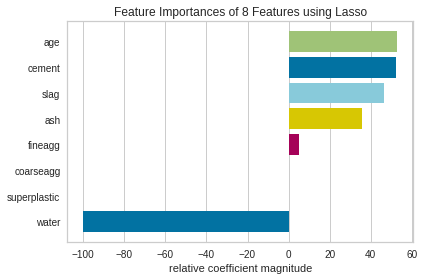

In [5]:
model = FeatureImportances(Lasso(alpha=5))
model.fit(X_train, y_train)
model.poof()

### Régression ElasticNet

* combine une régularization $L_1$ et une régularization $L_2$
* coefficients de régularisation $\alpha$ $(L_2)$ et $\rho$ $(L_1)$
* $\ell(y_i,f(x_i)) = (y_i - \beta^T x_i)^2$
* $\Omega(f) = \alpha \rho \|\beta\|_1 + \frac{\alpha(1-\rho)}{2}\|\beta\|_2$

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7efe555a1b00>,
                   colormap=None, colors=None, is_fitted='auto', labels=None,
                   model=None, relative=True, stack=False, xlabel=None)

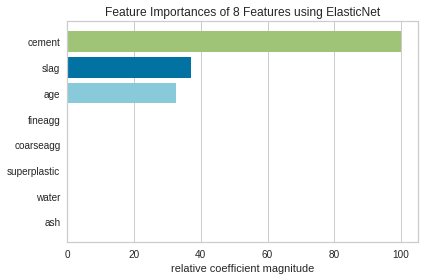

In [6]:
model = FeatureImportances(ElasticNet(alpha=15.5, l1_ratio=15.1))
model.fit(X_train, y_train)
model.poof()

## Regardons un peu le dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe555a39e8>,
      dtype=object)

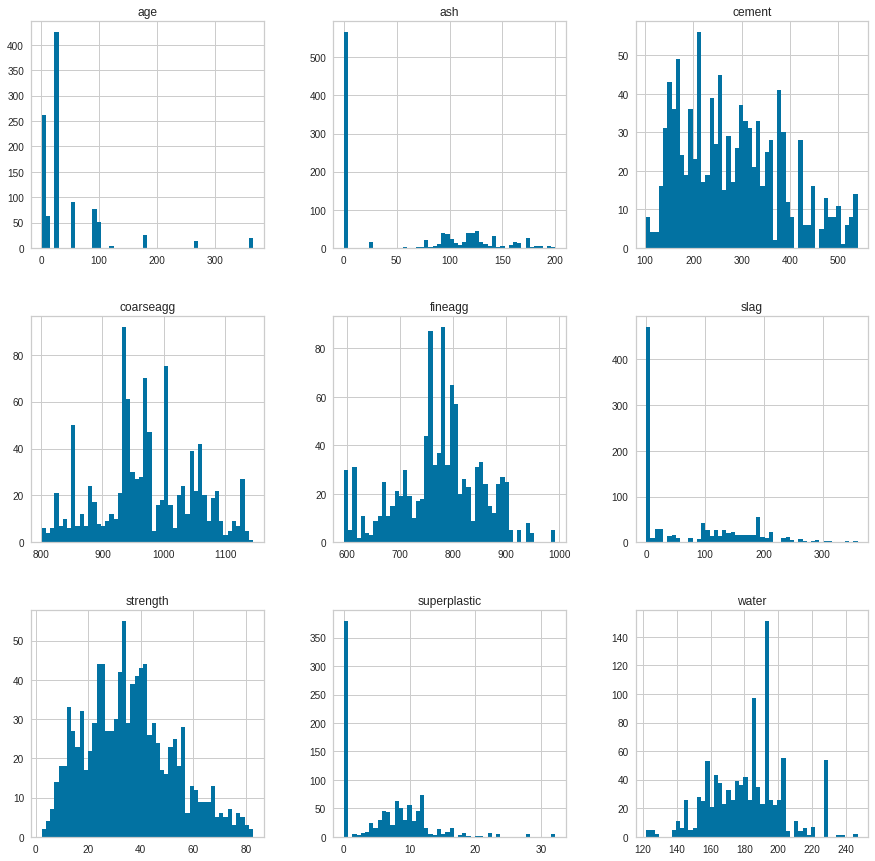

In [7]:
concrete = DataHelper('concrete')
X, y = concrete.gimme(normalized=False)
concrete.df.hist(bins=50, figsize=(15, 15))

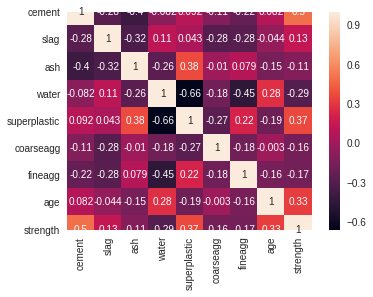

In [8]:
# sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(concrete.df.corr(), square=True, annot=True)

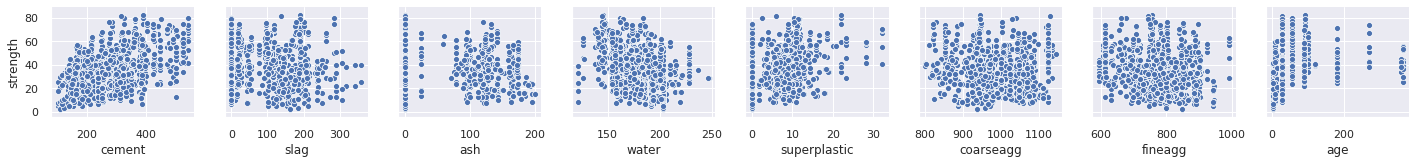

In [34]:
sns.pairplot(data=concrete.df,
             y_vars=['strength'],
             x_vars=['cement', 'slag', 'ash', 'water', 'superplastic',
                     'coarseagg', 'fineagg', 'age'])

In [ ]:
sns.pairplot(concrete.df, kind="reg")

### Sélection du paramètre $\alpha$

* Le choix de $\alpha$ est très important.

* On choisit $\alpha$ qui maximise l'erreur de cross validation parmi plusieurs
 valeurs définies dans une grille.  

AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f13480cc208>,
               is_fitted='auto', model=None)

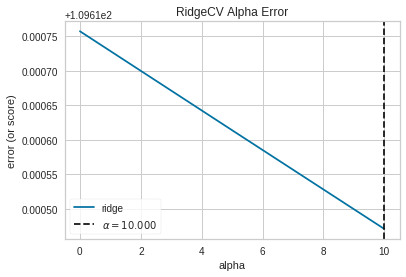

/home/hippo/Programs/anaconda3/envs/datascience/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/hippo/Programs/anaconda3/envs/datascience/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f131481e0b8>,
               is_fitted='auto', model=None)

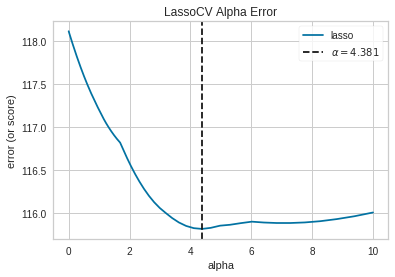

AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f13148b2470>,
               is_fitted='auto', model=None)

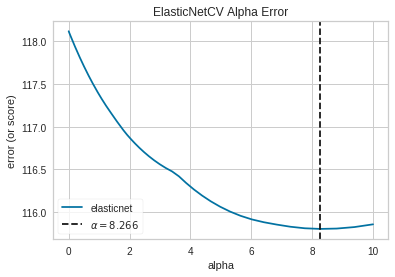

In [21]:
X, y = concrete.gimme(normalized=False)
alphas = np.logspace(-10, 1, 400)

viz = AlphaSelection(RidgeCV(alphas=alphas))
viz.fit(X, y)
viz.poof()

viz = AlphaSelection(LassoCV(alphas=alphas))
viz.fit(X, y)
viz.poof()

viz = AlphaSelection(ElasticNetCV(alphas=alphas))
viz.fit(X, y)
viz.poof()

PredictionError(alpha=0.75,
                ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1314b062b0>,
                bestfit=True, identity=True, is_fitted='auto', model=None,
                shared_limits=True)

0.6272369324574667

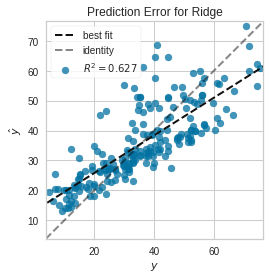

PredictionError(alpha=0.75,
                ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1314a47048>,
                bestfit=True, identity=True, is_fitted='auto', model=None,
                shared_limits=True)

0.6248096845622076

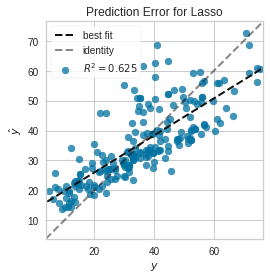

PredictionError(alpha=0.75,
                ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f13149e62b0>,
                bestfit=True, identity=True, is_fitted='auto', model=None,
                shared_limits=True)

0.6248215251016642

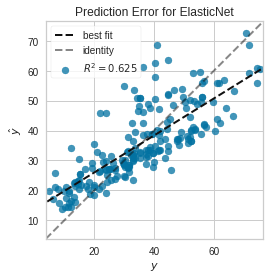

In [9]:
viz = PredictionError(Ridge(alpha=10_000))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

viz = PredictionError(Lasso(alpha=4.381))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

viz = PredictionError(ElasticNet(alpha=8.266))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

# **To do **
* Appliquer et comparer la régression Ridge et la régression Lasso sur le jeu
 de données boston. 

* Afficher l'erreur de prédiction sur les données de test et les données 
d'apprentissage en fonction du paramètre de régularisation.

* Afficher l'erreur de prédiction sur les donnÃ©es de test et les données 
d'apprentissage en fonction du nombre de donnÃ©es d'apprentissage dans les 
deux cas : $\alpha =0$ et $\alpha$ optimal choisi par cross-validation.

* Lire les sections 3.1 et 3.2 du chapitre 3 du livre "Pattern Recognition and
 Machine Learning" (Bishop, 2006).

In [10]:
boston = DataHelper('boston')
X_train, X_test, y_train, y_test = boston.gimme(normalized=True,
                                                split_ratio=0.2,
                                                seed=42)
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elasticnet': ElasticNet()}

params = {
    'Ridge': {
        'alpha': np.linspace(0.1, 20, 50)
    },
    'Lasso': {
        'alpha': np.linspace(0.1, 20, 50)
    },
    'Elasticnet': {
        'alpha': np.linspace(0.1, 20, 50),
        'l1_ratio': np.linspace(0.1, 1, 10)
    }}

In [11]:
grid = EstimatorSelectionHelper(models, params)
grid.fit(X_train, y_train, n_jobs=2)
grid_res = grid.score_summary(sort_by='mean_score',
                              num_rows_per_estimator=5)

Running GridSearchCV for Ridge.
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Running GridSearchCV for Lasso.
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Running GridSearchCV for Elasticnet.
Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 1166 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:    1.7s finished
/home/hippo/Programs/anaconda3/envs/datascience/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/hippo/Documents/university/m2/datascience/src/features/hyperparameter_selection.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A f

In [12]:
print(grid_res)

      estimator  mean_score    std_score  min_score    max_score     alpha  \
14        Ridge    0.724632    0.0175136   0.702261     0.745024   5.78571   
13        Ridge     0.72463    0.0175439   0.702131     0.744937   5.37959   
15        Ridge    0.724629    0.0174867   0.702383     0.745107   6.19184   
12        Ridge    0.724624    0.0175777   0.701992     0.744846   4.97347   
16        Ridge    0.724623     0.017463   0.702496     0.745186   6.59796   
100  Elasticnet    0.719641    0.0175439   0.704705     0.744266       0.1   
101  Elasticnet    0.716736    0.0164478    0.70339     0.739908       0.1   
102  Elasticnet    0.712311    0.0151082   0.699854     0.733573       0.1   
103  Elasticnet    0.705425    0.0142703   0.694257     0.725566       0.1   
104  Elasticnet    0.697328     0.015392   0.685923     0.719087       0.1   
50        Lasso    0.673872    0.0186256   0.657062      0.69984       0.1   
51        Lasso    0.330118    0.0348657   0.292904     0.376739

In [13]:
ridge_best_alpha = grid_res[grid_res['estimator'] == 'Ridge'].iloc[0].alpha
ridge_best = Ridge(alpha=ridge_best_alpha)
ridge_best.fit(X_train, y_train)

lasso_best_alpha = grid_res[grid_res['estimator'] == 'Lasso'].iloc[0].alpha
lasso_best = Lasso(alpha=lasso_best_alpha)
lasso_best.fit(X_train, y_train)

elasticnet_best_alpha = grid_res[grid_res['estimator'] == 'Elasticnet'].iloc[0].alpha
elasticnet_best_l1_ratio = grid_res[grid_res['estimator'] == 'Elasticnet'].iloc[0].l1_ratio
elasticnet_best = ElasticNet(alpha=elasticnet_best_alpha,
                             l1_ratio=elasticnet_best_l1_ratio)
elasticnet_best.fit(X_train, y_train)

print('Ridge score on train {}'.format(ridge_best.score(X_train, y_train)))
print('Ridge score on test {}\n'.format(ridge_best.score(X_test, y_test)))

print('Lasso score on train {}'.format(lasso_best.score(X_train, y_train)))
print('Lasso score on test {}\n'.format(lasso_best.score(X_test, y_test)))

print('Elasticnet score on train {}'.format(elasticnet_best.score(X_train, y_train)))
print('Elasticnet score on test {}\n'.format(elasticnet_best.score(X_test, y_test)))

Ridge(alpha=5.785714285714285, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Ridge score on train 0.7517553687034477
Ridge score on test 0.6650975179068099

Lasso score on train 0.6840714737567584
Lasso score on test 0.6256864333659344

Elasticnet score on train 0.7370885078736397
Elasticnet score on test 0.6469033629214763

